# Clustering Analysis (Birth Place Location)

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
from lat_lon_parser import parse
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

## Import Excel Data

In [2]:
map = {}
xls = pd.ExcelFile('nba_draft.xlsx')
for sheet_name in xls.sheet_names:
    map[sheet_name] = xls.parse(sheet_name)

## Initialize Parameters

In [3]:
num_clusters = 7
max_draft_selection = 60
positions = []
start_year = 1990
end_year = 2020
color_theme = np.array(['red','blue','green', 'yellow', 'orange', 'brown', 'purple', 'teal', 'dark blue', 'dark green'])

## Clean, Partition, Transform Data 

In [4]:
df = []
for i in range(start_year, end_year):
    df.append(map['draft_data_{}'.format(i)])
    
percentages_df = pd.concat(df)
percentages_df = percentages_df[percentages_df['Pk']  <= max_draft_selection]
if len(positions) != 0:
    percentages_df = percentages_df[percentages_df['position'].isin(positions)]
loc_df = percentages_df.iloc[:, -2:]
loc_df = loc_df.dropna()
loc_df['bp_latitude'] = loc_df.bp_latitude.apply(lambda x: parse(x))  
loc_df['bp_longitude'] = loc_df.bp_longitude.apply(lambda x: parse(x)) 
loc_df_with_years = percentages_df.iloc[:, list(range(50,52)) + [-3]]
loc_df_with_years = loc_df_with_years.dropna()
data = loc_df.to_numpy()
clustering  = KMeans(n_clusters=num_clusters,random_state=5)
clustering.fit(data)
loc_df.columns = ['Latitude','Longitude']

## Elbow Method

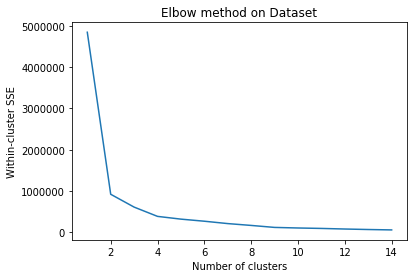

In [5]:
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

## Clustering Output (2D Plots)

Clusters: [[  37.89832147  -84.10889021]
 [   2.45304835  -61.02172524]
 [  41.54949625   51.4532128 ]
 [  39.99241467 -116.83086967]
 [ -16.65448799  138.27331588]
 [  46.99679273   14.36685741]
 [   6.88179624    8.08766835]]


-84.10889021208683, 37.89832146745868
-61.021725245, 2.453048352500005
51.453212801099035, 41.549496250549446
-116.83086966958324, 39.992414672083335
138.2733158823529, -16.654487994117666
14.366857407583119, 46.99679273459717
8.087668352499996, 6.8817962449999825


red: Cluster 0
blue: Cluster 1
green: Cluster 2
yellow: Cluster 3
orange: Cluster 4
brown: Cluster 5
purple: Cluster 6


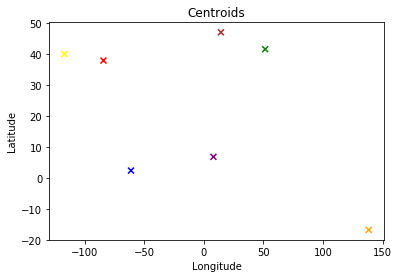

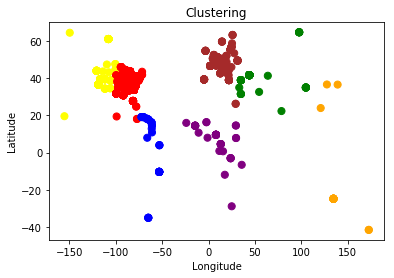

In [6]:
centroids = clustering.cluster_centers_
print('Clusters: {}'.format(centroids))
print('\n')
for i in range(len(centroids)):
    print('{}, {}'.format(centroids[i][1], centroids[i][0]))
print('\n')
t = np.arange(num_clusters)
for i in range(len(centroids)):
    print('{}: Cluster {}'.format(color_theme[i], i))
    
plt.scatter(centroids[:,1], centroids[:,0], marker="x", c=color_theme[t])
plt.title('Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

plt.scatter(x=loc_df.Longitude,y=loc_df.Latitude,c=color_theme[clustering.labels_],s=50)
plt.title('Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##  Clustering Output Aggregations

In [7]:
cluster_counts = {}
for i in range(len(clustering.labels_)):
    if clustering.labels_[i] not in cluster_counts:
        cluster_counts[clustering.labels_[i]] = 1
    else:
        cluster_counts[clustering.labels_[i]] += 1
print('Totals:')
for i in cluster_counts:
    print('{} players were drafted in the top {} picks of their respective draft that fall in cluster {}'.format(cluster_counts[i], max_draft_selection, i))

print('Sum: {}'.format(sum(cluster_counts.values())))
print('\n')
        
decade_counts = {1990: {}, 2000: {}, 2010: {}}
for i in range(num_clusters):  
    decade_counts[1990.0][i] = 0
    decade_counts[2000.0][i] = 0
    decade_counts[2010.0][i] = 0

for i in range(len(clustering.labels_)):
    if (1990.0 <= loc_df_with_years.iloc[i][2] < 2000.0):  
        decade_counts[1990][clustering.labels_[i]] += 1
    elif (2000.0 <= loc_df_with_years.iloc[i][2] < 2010.0):  
        decade_counts[2000][clustering.labels_[i]] += 1
    elif (2010.0 <= loc_df_with_years.iloc[i][2] < 2020.0):  
        decade_counts[2010][clustering.labels_[i]] += 1
    else:
        print(i)
        print(clustering.labels_[i])
        print(loc_df_with_years.iloc[i])
        
    
for i in decade_counts:
    print('In the {}\'s'.format(i))
    for j in decade_counts[i]:
        print('     {} players were drafted in the top {} picks of their respective draft that fall in cluster {}'.format(decade_counts[i][j],max_draft_selection,  j))
    print('Sum: {}'.format(sum(decade_counts[i].values())))
    print('\n')

Totals:
968 players were drafted in the top 60 picks of their respective draft that fall in cluster 0
240 players were drafted in the top 60 picks of their respective draft that fall in cluster 3
211 players were drafted in the top 60 picks of their respective draft that fall in cluster 5
40 players were drafted in the top 60 picks of their respective draft that fall in cluster 1
40 players were drafted in the top 60 picks of their respective draft that fall in cluster 6
17 players were drafted in the top 60 picks of their respective draft that fall in cluster 4
91 players were drafted in the top 60 picks of their respective draft that fall in cluster 2
Sum: 1607


In the 1990's
     351 players were drafted in the top 60 picks of their respective draft that fall in cluster 0
     6 players were drafted in the top 60 picks of their respective draft that fall in cluster 1
     19 players were drafted in the top 60 picks of their respective draft that fall in cluster 2
     65 players we

##  Cluster Dendogram

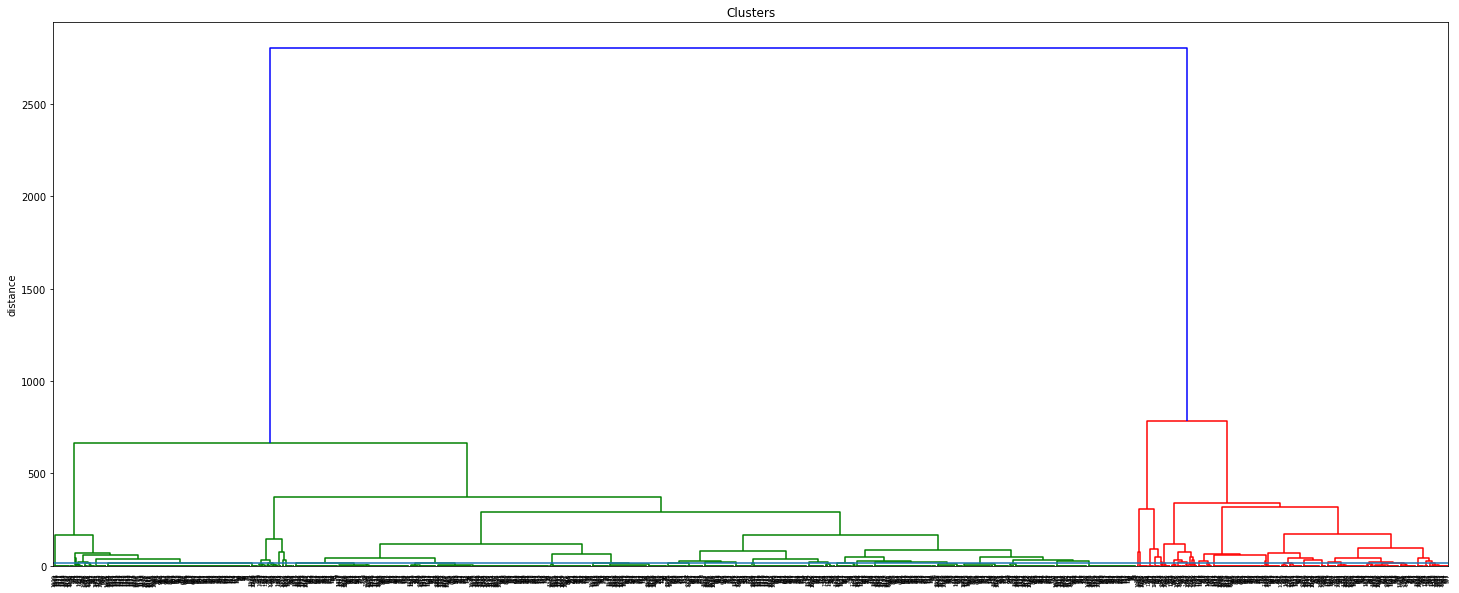

In [8]:
Z = linkage(data,'ward')

plt.figure(figsize=(25,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z)

plt.axhline(y=15)
plt.show()